In [33]:
import numpy as np
from skimage import io
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow 
import matplotlib.pylab as plt




AxesImage(20.3509,27.8;400.849x245.501)


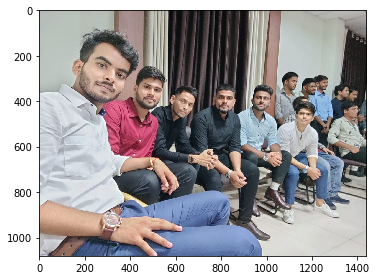

In [38]:

######################################
# READ IMAGE FROM FILE
######################################
#load file as pillow Image 
img = cv2.imread('friends.jpg')
print(io.imshow('friends.jpg'))




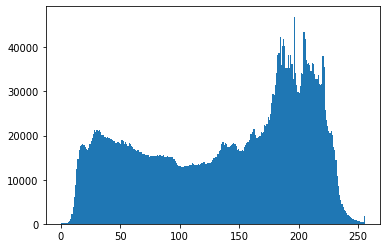

In [39]:
plt.hist(img.ravel(),bins = 256, range = [0,256]) 
plt.show()

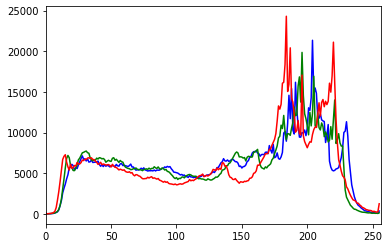

In [45]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

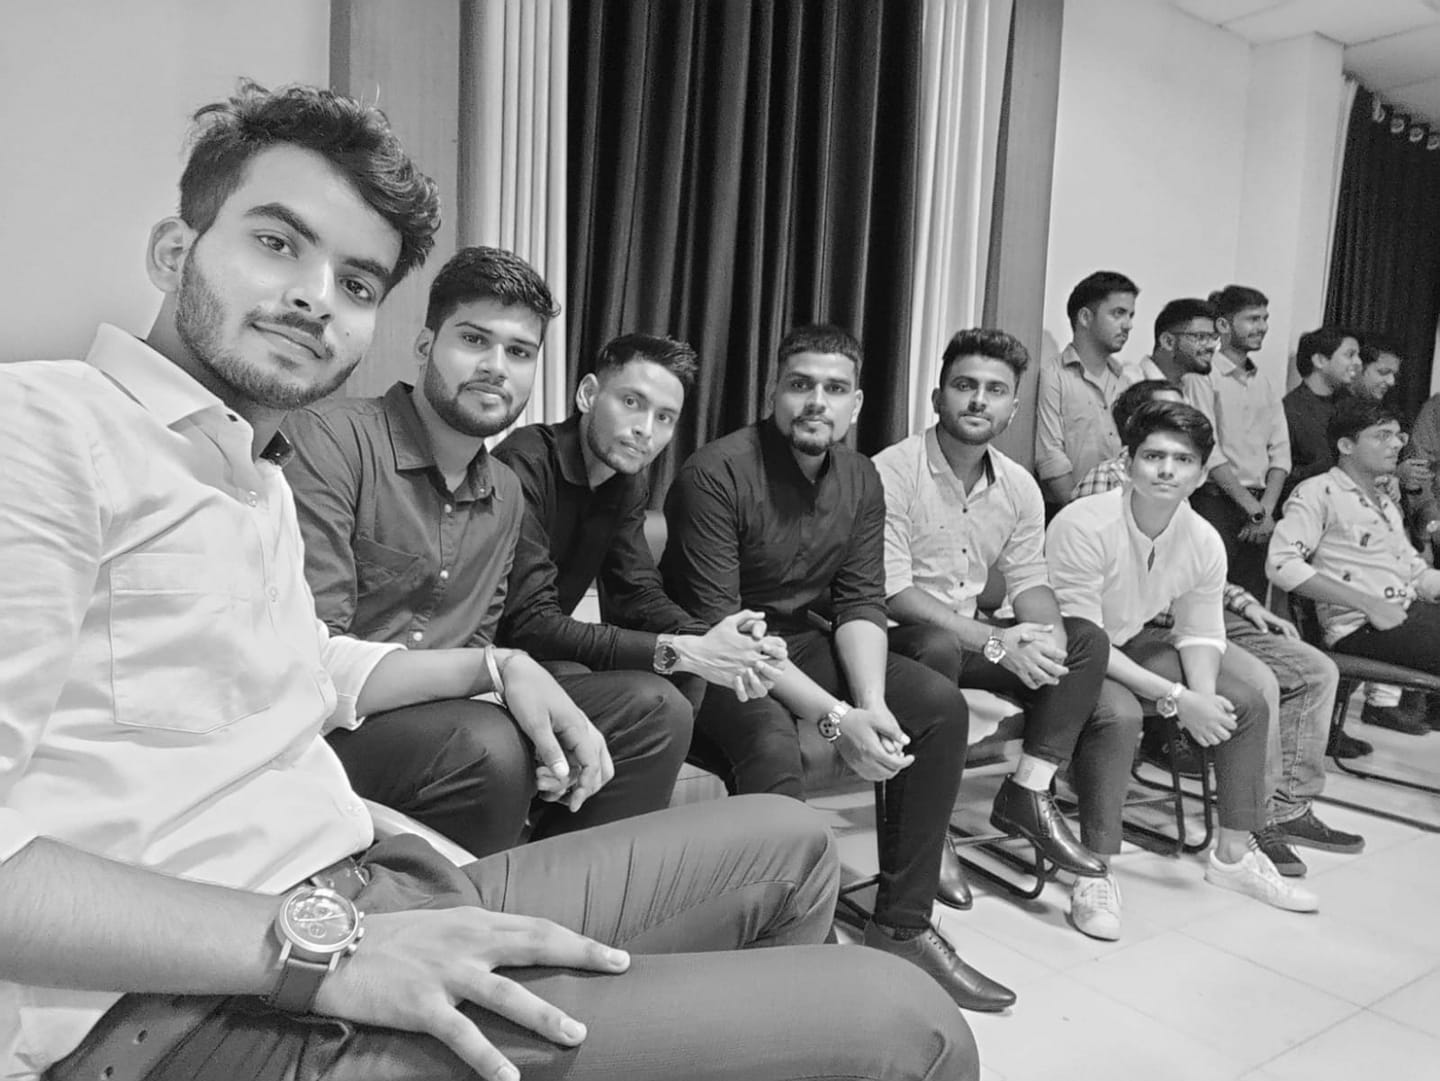

In [42]:
# convert to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
cv2_imshow(gray_image)

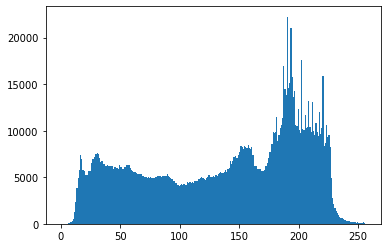

In [44]:
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

AxesImage(20.3509,27.8;400.849x245.501)


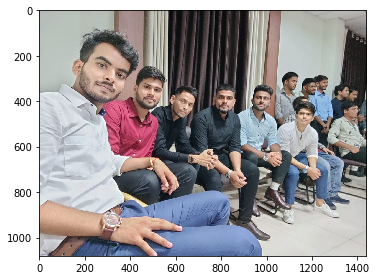

In [46]:
img = Image.open('friends.jpg')
print(io.imshow('friends.jpg'))

# convert to grayscale
imgray = img.convert(mode='L')

#convert to NumPy array
img_array = np.asarray(imgray)


In [47]:


######################################
# PERFORM HISTOGRAM EQUALIZATION
######################################


#STEP 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning

histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

chistogram_array = np.cumsum(histogram_array)


In [48]:
#STEP 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

In [49]:


#STEP 3: Transformation
# flatten image array into 1D list

img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = []
for p in img_list:
  eq_img_list.append(transform_map[p])

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)



AxesImage(20.3509,27.8;400.849x245.501)


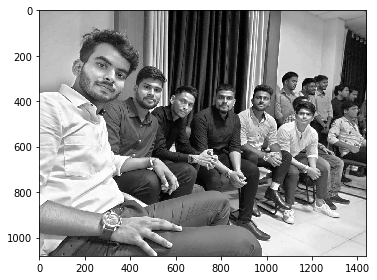

In [50]:
######################################
# EQUALIZED IMAGE TO FILE
######################################
#convert NumPy array to pillow Image and write to file
eq_img = Image.fromarray(eq_img_array, mode='L')
eq_img.save('output_image.jpg')
print(io.imshow('output_image.jpg'))

In [51]:
#Alternative Method

In [52]:
img = cv2.imread("friends.jpg", cv2.IMREAD_COLOR)

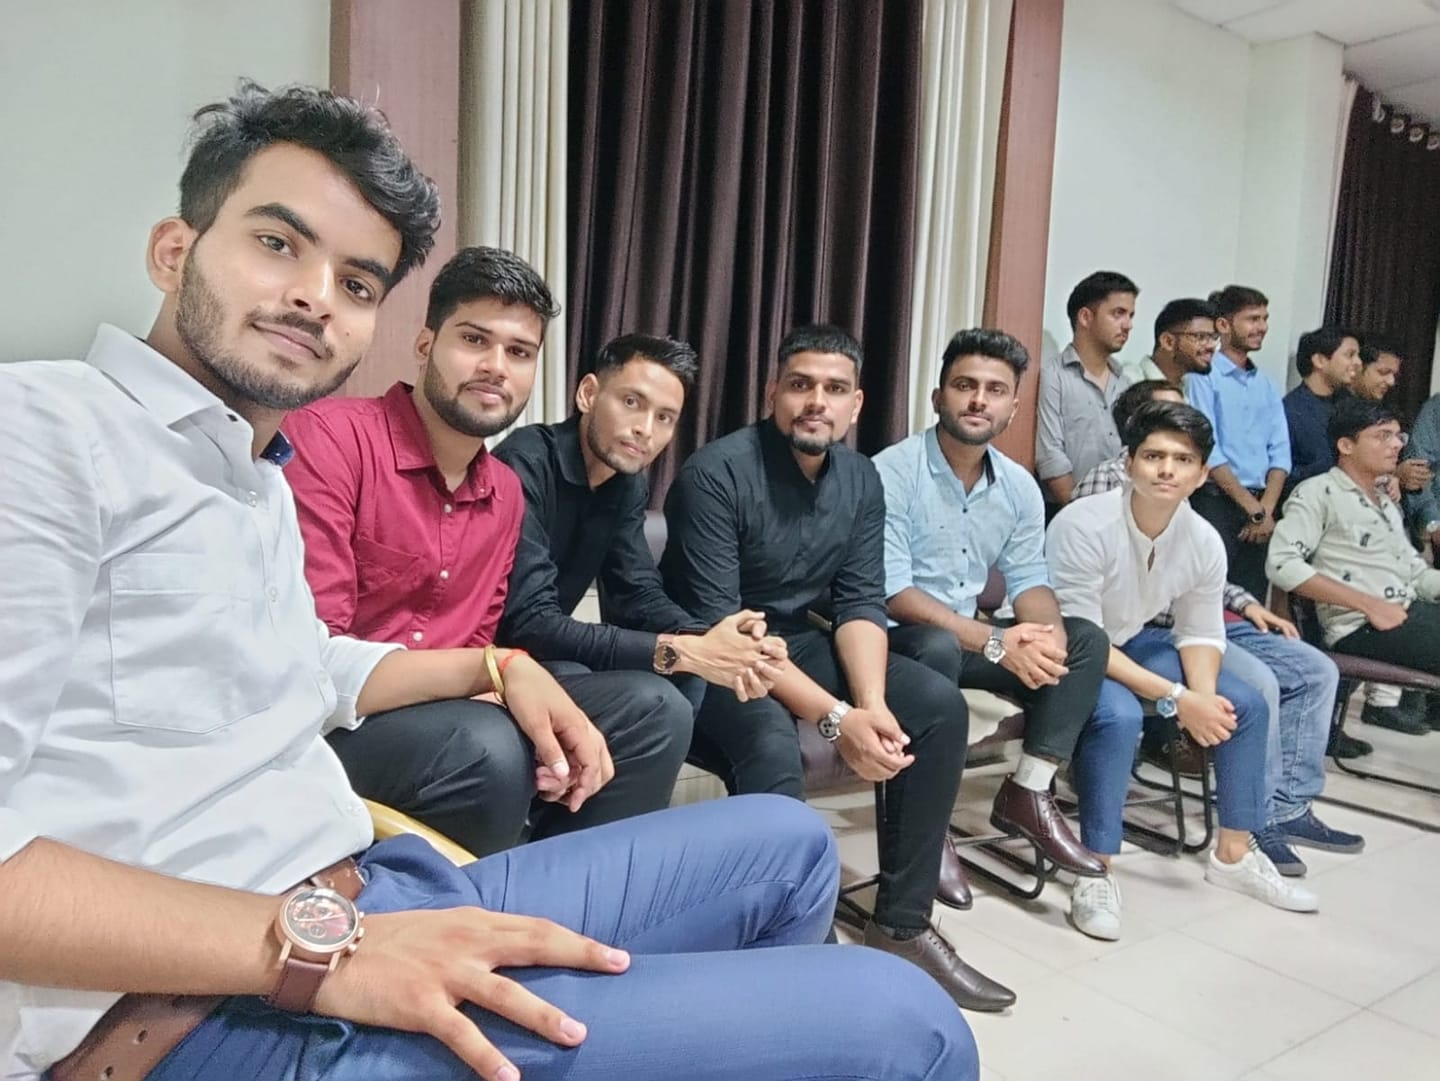

In [53]:
cv2_imshow(img)

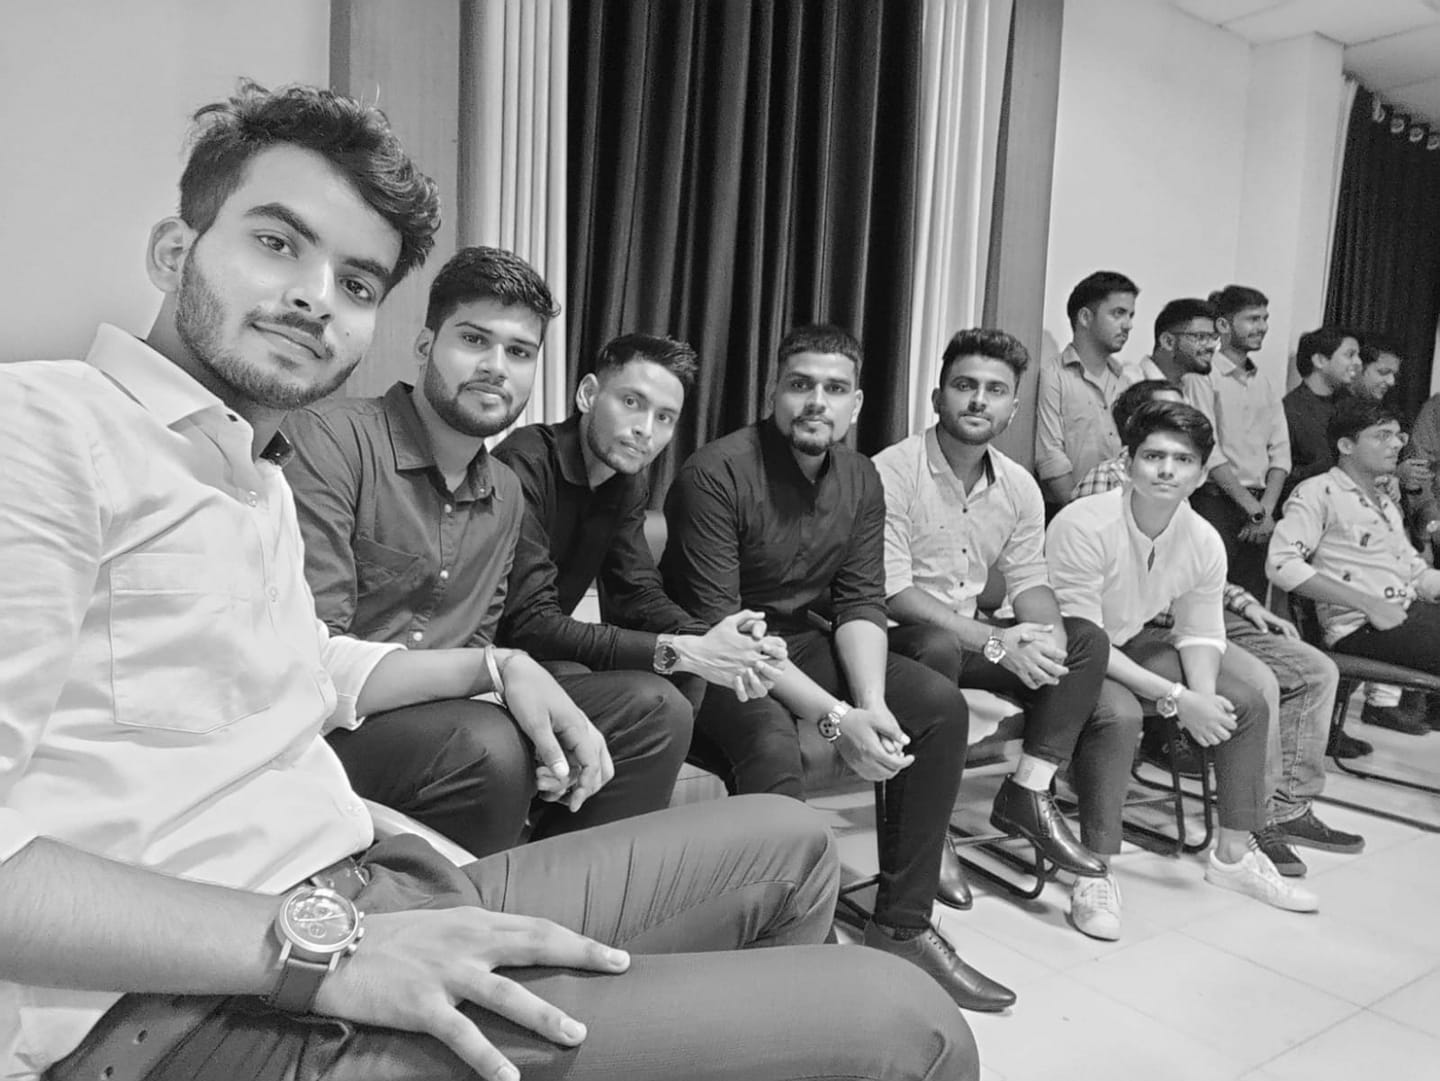

In [54]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
cv2_imshow(gray_image)

In [55]:
equ = cv2.equalizeHist(gray_image)

In [56]:
res = np.hstack((gray_image, equ))

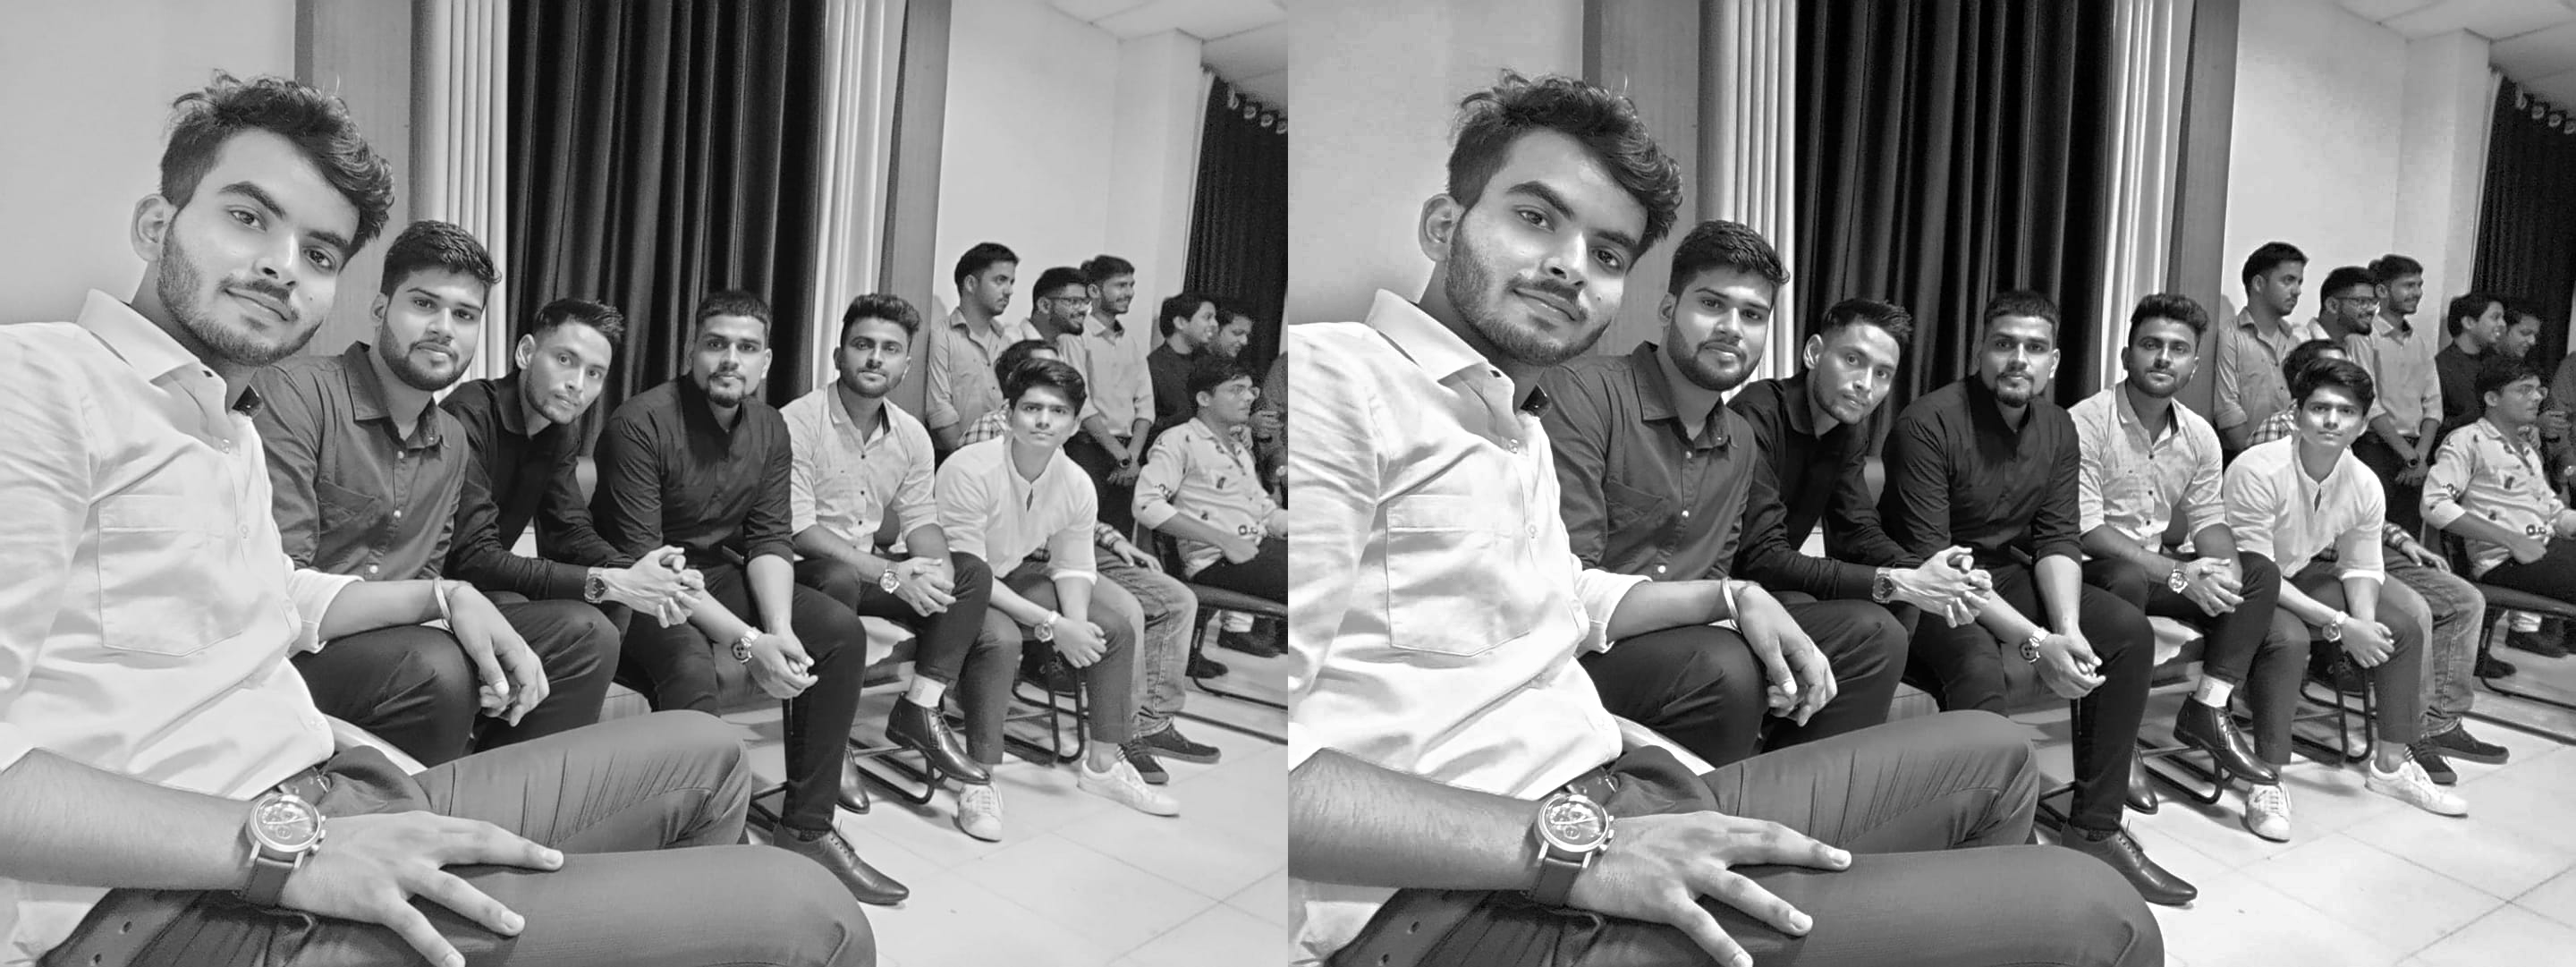

In [57]:
cv2_imshow(res)

In [58]:
cv2.imwrite('output_2.jpg', res)

True


###link for colab
https://colab.research.google.com/drive/1OhCGTq4X47xNQjJUutoP7A0koyi-igKH?usp=sharing

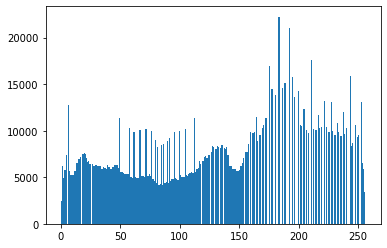

In [60]:
plt.hist(equ.ravel(),bins = 256, range = [0, 256])
plt.show()

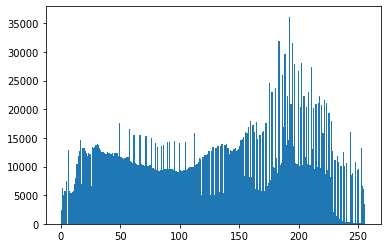

In [61]:
plt.hist(res.ravel(),bins = 256, range = [0, 256])
plt.show()